In [52]:
!pip install -r requirements.txt

You should consider upgrading via the '/Users/jirayuwat/Desktop/GAN-indiv-study/env/bin/python3 -m pip install --upgrade pip' command.


# import lib

In [53]:
import torch
from torch import nn

import numpy as np

import matplotlib.pyplot as plt

# First Torch model

## mock up dataset

In [54]:
# create 100 sample (50 for each class)
# data is seperate with line x = 6
## if x >= 6 -> True
## else -> False

X = [6] * 50 + [0] * 50
y = [1] * 50 + [0] * 50

noise = np.random.default_rng().random(100)
noise *= 6

X = torch.Tensor(X) + noise
X = X.reshape(100,1).to(torch.float32)
y = torch.Tensor(y).reshape(100,1).to(torch.float32)



In [55]:
print(f'''\
X = {X.shape}, {type(X[0])}
y = {y.shape}, {type(y[0])}
''')

X = torch.Size([100, 1]), <class 'torch.Tensor'>
y = torch.Size([100, 1]), <class 'torch.Tensor'>



## create model

In [56]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.log_reg = nn.Sequential(
            nn.Linear(input_size, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        ''' what happen on forward pass'''
        return self.log_reg(x)
    

In [57]:
model = LogisticRegression(input_size=1) 

# setup loss function
critirion = nn.BCELoss()

# setup optimizer
optimizer = torch.optim.SGD(model.parameters(),
                            lr = 0.01)


In [58]:
Loss_hist = []

In [59]:
EPOCHS = 1000

for epoch in range(EPOCHS):

    # predict
    y_pred = model(X)
    # loss calculate
    loss = critirion(y_pred, y)
    # zero grad
    optimizer.zero_grad()
    # back propergation
    loss.backward()
    # step
    optimizer.step()
    # print
    Loss_hist += [loss.item()]

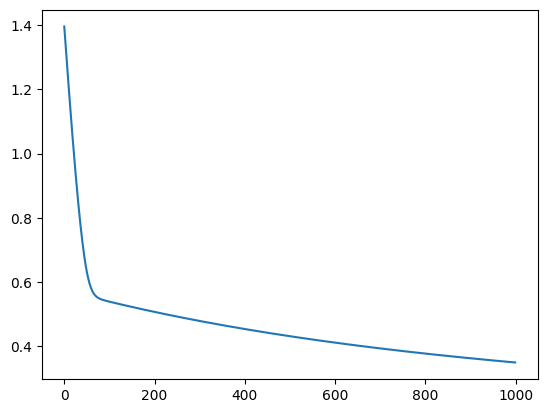

In [60]:
plt.plot(range(EPOCHS),Loss_hist)